<a href="https://colab.research.google.com/github/smucon-dev/ml_basics/blob/main/Perceptron_Plain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import random

This plain perceptron can solve classification problems only if classes are lineary separable. We will use a **NAND** scenario for demonstration purposes.<br>

| x1 | x2 | y |
| :--: | :--: | :-: |
| -1 | -1 | 1 |
|  1 | -1 | 1 |
| -1 |  1 | 1 |
|  1 |  1 | 0 |




Text(0, 0.5, 'x2')

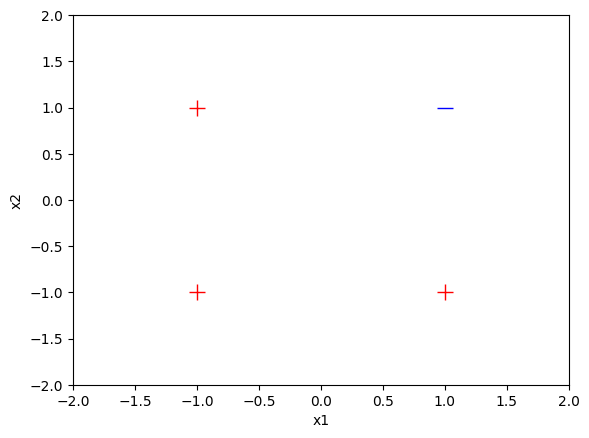

In [2]:
plt.plot([1.0], [1.0], 'b_', markersize=12)
plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0], 'r+', markersize=12)
plt.axis([-2, 2, -2, 2])
plt.xlabel('x1')
plt.ylabel('x2')

In [3]:
# Define variables needed for plotting.
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0

def show_learning(w):
    global color_index
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
          ', w2 =', '%5.2f' % w[2])
    if color_index == 0:
        plt.plot([1.0], [1.0], 'b_', markersize=12)
        plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0],
                 'r+', markersize=12)
        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')
    x = [-2.0, 2.0]
    if abs(w[2]) < 1e-5:
        y = [-w[1]/(1e-5)*(-2.0)+(-w[0]/(1e-5)),
            -w[1]/(1e-5)*(2.0)+(-w[0]/(1e-5))]
    else:
        y = [-w[1]/w[2]*(-2.0)+(-w[0]/w[2]),
            -w[1]/w[2]*(2.0)+(-w[0]/w[2])]
    plt.plot(x, y, color_list[color_index])
    if color_index < (len(color_list) - 1):
        color_index += 1

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


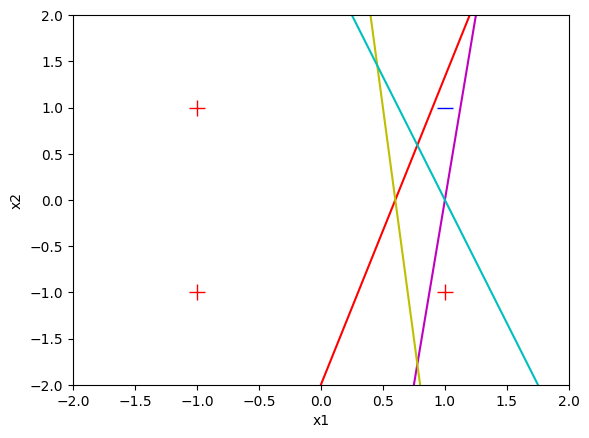

In [4]:
# Training examples (bias, x1, x2)
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)]
y_train = [1.0, 1.0, 1.0, -1.0]

# Define perceptron weights.
w = [0.2, -0.6, 0.25] # Initialize to some “random” numbers

# Define variables needed to control training process.
random.seed(7) # To make repeatable
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3] # Used to randomize order

# First element in vector x must be 1.
# Length of w and x must be n+1 for neuron with n inputs.
def compute_output(w, x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i] # Compute sum of weighted inputs
    if z < 0: # Apply sign function
        return -1
    else:
        return 1

# Perceptron training loop.
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) # Randomize order
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) # Perceptron function

        if y != p_out: # Update weights when wrong
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w) # Show updated weights